In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


In [2]:
# sankey
df = pd.read_csv('data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# mascara para categortizacion
dict_mask = {
    'Pregnancies':{
        'Preg 0': [0],
        'Preg 1': [1],
        'Preg 2': [2],
        'Preg 3': [3],
        'Preg 4+':[4, 100]
    },
    'Glucose': {
        'Glu 0-50': [0, 50],
        'Glu 51-100': [50, 100],
        'Glu 101-150': [100, 150],
        'Glu >150': [150, 500]
    },
    'BloodPressure': {
        'BP 0-50':[0, 50],
        'BP 50-100': [50, 100],
        'BP >100': [100, 500]
    },
    'SkinThickness': {
        'SkinT 0-25': [0, 25],
        'SkinT 26-50': [25, 50],
        'SkinT 51-75': [50, 75],
        'SkinT >75': [75, 500]     
    },
    'Insulin': {
        'Ins 0-25': [0, 25],
        'Ins 26-50': [25, 50],
        'Ins 51-75': [50, 75],
        'Ins >75': [75, 5000]    
    },
    'BMI': {
        'BMI 0-25': [0, 25],
        'BMI 25.01-50': [25, 50],
        'BMI >50': [50, 500]
    },
    'DiabetesPedigreeFunction': {
        'DPF 0-0.5': [0, 0.5],
        'DPF 0.51-1.00': [0.5, 1.00],
        'DPF >1.00': [1, 100] 
    },
    'Age': {
        'age 0-20': [0, 20],
        'age 21-40': [20, 40],
        'age 41-60': [40, 60],
        'age 61-80': [60, 80],
        'age >80':[80, 500]
    },
    'Outcome': {
        'no': [0],
        'yes': [1]
    }
}




In [4]:
def run_mask(value, var_name, dict_mask):
    # print(var_name, value)
    for key, values in dict_mask[var_name].items():
        # print(key, values)
        if len(values) > 1:
            if values[0] <= value < values[1]:
                masked_value = key
                # print("masked_value", masked_value)
        else:
            if value == values[0]:
                masked_value = key
                # print("masked_value", masked_value)

    return masked_value

In [5]:
df_mask = df.copy()

# variable = list(dict_mask.keys())[0]
# variable
for variable in df_mask.columns:
    df_mask[variable] = df_mask[variable].apply(
        lambda x: run_mask(x, variable, dict_mask)
    )
df_mask['index'] = df_mask.index
df_mask

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,index
0,Preg 4+,Glu 101-150,BP 50-100,SkinT 26-50,Ins 0-25,BMI 25.01-50,DPF 0.51-1.00,age 41-60,yes,0
1,Preg 1,Glu 51-100,BP 50-100,SkinT 26-50,Ins 0-25,BMI 25.01-50,DPF 0-0.5,age 21-40,no,1
2,Preg 4+,Glu >150,BP 50-100,SkinT 0-25,Ins 0-25,BMI 0-25,DPF 0.51-1.00,age 21-40,yes,2
3,Preg 1,Glu 51-100,BP 50-100,SkinT 0-25,Ins >75,BMI 25.01-50,DPF 0-0.5,age 21-40,no,3
4,Preg 0,Glu 101-150,BP 0-50,SkinT 26-50,Ins >75,BMI 25.01-50,DPF >1.00,age 21-40,yes,4
...,...,...,...,...,...,...,...,...,...,...
763,Preg 4+,Glu 101-150,BP 50-100,SkinT 26-50,Ins >75,BMI 25.01-50,DPF 0-0.5,age 61-80,no,763
764,Preg 2,Glu 101-150,BP 50-100,SkinT 26-50,Ins 0-25,BMI 25.01-50,DPF 0-0.5,age 21-40,no,764
765,Preg 4+,Glu 101-150,BP 50-100,SkinT 0-25,Ins >75,BMI 25.01-50,DPF 0-0.5,age 21-40,no,765
766,Preg 1,Glu 101-150,BP 50-100,SkinT 0-25,Ins 0-25,BMI 25.01-50,DPF 0-0.5,age 41-60,yes,766


In [6]:
data_links = []
columns = [variable for variable in df_mask.columns if variable != 'index']

for i in range(len(columns) - 1):
    # print(columns[i], columns[i+1])
    source_column = columns[i]
    target_column = columns[i + 1]

    df_count = df_mask.groupby([source_column, target_column])['index'].count().reset_index()
    df_count.columns = ['source', 'target', 'value']
    # print(df_count)
    data_links.append(df_count)

data_links = pd.concat(data_links)
data_links


,source,target,value
0,Preg 0,Glu 101-150,71
1,Preg 0,Glu 51-100,21
2,Preg 0,Glu >150,19
3,Preg 1,Glu 0-50,3
4,Preg 1,Glu 101-150,69
...,...,...,...
2,age 41-60,no,76
3,age 41-60,yes,99
4,age 61-80,no,22
5,age 61-80,yes,9


In [7]:

#for using with 'label' parameter in plotly 
#https://sparkbyexamples.com/pandas/pandas-find-unique-values-from-columns
unique_source_target = list(pd.unique(data_links[['source', 'target']].values.ravel('K')))

#for assigning unique number to each source and target
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}

#mapping of full data
data_links['source'] = data_links['source'].map(mapping_dict)
data_links['target'] = data_links['target'].map(mapping_dict)

#converting full dataframe as list for using with in plotly
links_dict = data_links.to_dict(orient='list')

#Sankey Diagram Code 
fig = go.Figure(data=[go.Sankey(
    node = dict(
    pad = 15,
    thickness = 20,
    line = dict(color = "black", width = 0.5),
    label = unique_source_target,

    ),
    link = dict(
    source = links_dict["source"],
    target = links_dict["target"],
    value = links_dict["value"],

))])

fig.update_layout(title_text="Diabetes Sankey Diagram", font_size=10,width=1000, height=600)
fig.show()



In [8]:
# gauge



In [9]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = df['Age'].mean(),
    mode = "gauge+number",
    title = {'text': "Mean Age Diabetes Study"},
    
    gauge = {'axis': {'range': [None, 100]},
            'steps' : [
                {'range': [0, 20], 'color': "lightgray"},
                {'range': [20, 40], 'color': "gray"},
                {'range': [40, 60], 'color': "lightgray"},
                {'range': [60, 80], 'color': "gray"},
                {'range': [80, 100], 'color': "lightgray"}
                ],
            }))

fig.show()

In [10]:
# hexagon bining

In [11]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


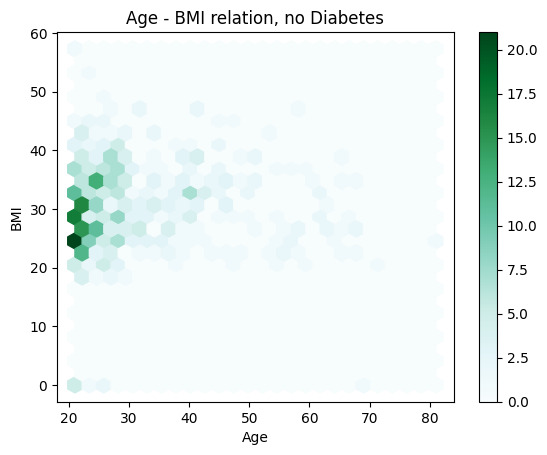

In [27]:

df[df['Outcome'] == 0].plot.hexbin(x='Age', y='BMI', gridsize=25, title="Age - BMI relation, no Diabetes")
plt.show()

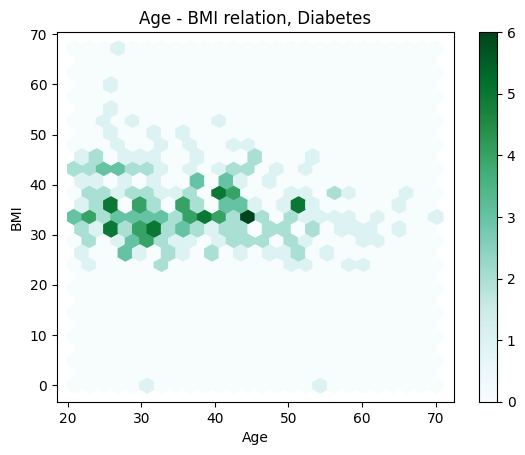

In [28]:
df[df['Outcome'] == 1].plot.hexbin(x='Age', y='BMI', gridsize=25, title="Age - BMI relation, Diabetes")
plt.show()

In [ ]:
ax.hexbin(x = x, y = y, gridsize = 15, alpha = 0.5)
ax.hexbin(x = x, y = y, gridsize = 15,
          edgecolor = "white", linewidths = 1.5)

ValueError: First argument must be a sequence

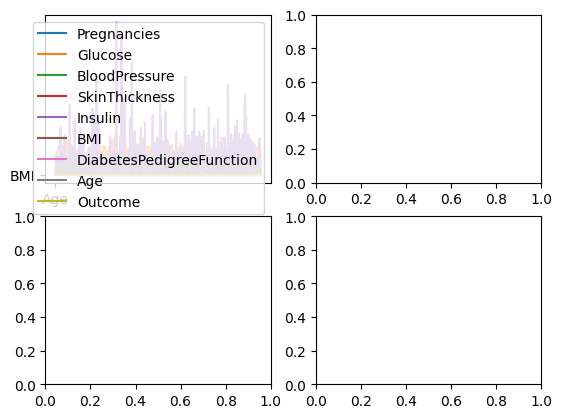

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2)

#add DataFrames to subplots
df[df['Outcome'] == 0].plot(ax=axes[0,0]).hexbin(x='Age', y='BMI', gridsize=25, title="Age - BMI relation, no Diabetes")
df[df['Outcome'] == 1].plot(ax=axes[0,1]).hexbin(x='Age', y='BMI', gridsize=25, title="Age - BMI relation, Diabetes")

plt.show()